In [1]:
#!pip install faker
#!pip uninstall elasticsearch --yes
#!pip uninstall certifi --yes
#!pip install ujson
#!pip install -U elasticsearch
#!pip install -U certifi
#!pip install pandasticsearch[pandas]
#!pip install elasticsearch_dsl

In [1]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import requests
from faker import Faker
import ujson as json
import pandas as pd
import requests
from numpy import random 
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch_dsl import Search, DocType, Date, Integer, Keyword, Text
from datetime import datetime
from elasticsearch_dsl.connections import connections
import requests
from random import randint
from pandas.io.json import json_normalize
from pandasticsearch import DataFrame
from pandasticsearch import Select

ES_HOST = 'http://ec2-34-205-15-150.compute-1.amazonaws.com:9200'
INDEX = "eda_new"
DOC_TYPE="user"
es = Elasticsearch(ES_HOST)
es.indices.put_settings(index=INDEX,
                        body= {"index" : {
                                "max_result_window" : 750000
                              }})

{'acknowledged': True}

In [2]:
## Create Elasticsearch Query
query0 = {
            "from" : 0, 
            "size" : 70000,
            "query": {
                        "match_all": {}
                     }
            }

In [3]:
## Import Data into a Panda dataframe
result_dict = es.search(index=INDEX, body=query0)
df = Select.from_dict(result_dict).to_pandas()
df = df.set_index(['_id'])
df.drop(['_index', '_score', '_type'],inplace=True,axis=1,errors='ignore')

In [4]:
df.head()


,Avg Order Value,City,days_since_last_purchase,discount_percentage,email_unsubscribe,f_score,lifecycle,m_score,name,num_of_orders,r_score,revenue,rfm_score,segments,total_discount_revenue
_id,,,,,,,,,,,,,,,
0ce81a1e-f3c2-02d4-8fd1-49307ad26c1b,1128.568182,Lucknow,52,29,False,8,Loyal (Sleeping),8,Michael Goodman,44,5,49657,21,[High Discount Seeker],14400.53
4d88c2e9-fb30-2fda-4b23-807b08457cf0,3375.538462,Chennai,29,23,False,5,Loyal (Sleeping),8,Tony Adams,13,7,43882,20,[High Cart Value],10092.86
fad0c0a5-8ec6-721e-8180-d902cf1fa86d,674.220000,Noida,24,20,False,8,Loyal (Sleeping),8,Eric Clark,50,7,33711,23,[NCR],6742.20
c1e9d162-7349-ee0f-556d-264aca508b47,3249.153846,Ahmedabad,45,10,False,5,Loyal (Sleeping),8,Daniel Thomas,13,5,42239,18,[High Cart Value],4223.90
18a3b227-a9e6-412d-25c9-771966d9cd02,1089.304348,Chennai,1,23,False,6,Loyal (Active),8,Samuel Miller,23,9,25054,23,[],5762.42


In [5]:
df.describe()

,Avg Order Value,days_since_last_purchase,discount_percentage,f_score,m_score,num_of_orders,r_score,revenue,rfm_score,total_discount_revenue
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,991.842158,49.886143,16.947043,0.734629,2.201086,2.339300,5.471343,3182.034257,8.407057,539.924847
std,981.276821,28.553302,7.208599,1.490181,1.939997,6.680634,1.775885,7851.974816,3.693107,1457.880388
min,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
25%,222.000000,25.000000,11.000000,0.000000,0.000000,1.000000,4.000000,229.000000,6.000000,18.440000
50%,806.750000,50.000000,17.000000,0.000000,2.000000,1.000000,5.000000,985.000000,8.000000,148.520000
75%,1360.541667,75.000000,23.000000,1.000000,3.000000,2.000000,7.000000,2228.000000,10.000000,369.750000
max,4967.000000,99.000000,29.000000,9.000000,9.000000,246.000000,9.000000,99811.000000,27.000000,28189.740000


## 1.1 Histograms
- A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of **continuous data**. 
- This allows the inspection of the data for its underlying distribution (e.g., normal distribution),width of spread, median data value, outliers, skewness, etc. 


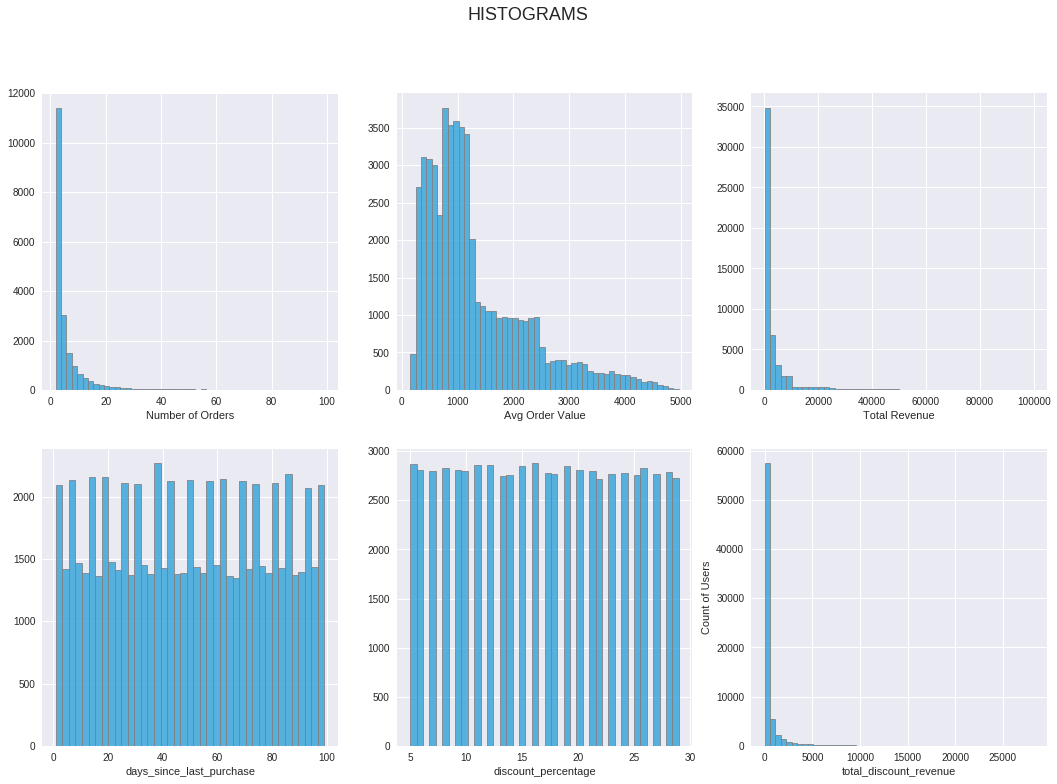

In [7]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
 
sns.set_palette(five_thirty_eight)
fig, axes = plt.subplots(2,3, figsize=(18,12))

sns.distplot(df.num_of_orders[(df.num_of_orders>1) & (df.num_of_orders<100)],  kde=False, 
             ax = axes[0,0], hist_kws={"linewidth": 1, "alpha": 0.8, "edgecolor":"grey"})
#axes[0].set_title("Total Order Distribution")
axes[0,0].set(xlabel='Number of Orders')


sns.distplot(df['Avg Order Value'][df['Avg Order Value']>0] ,kde=False, 
             ax = axes[0,1],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[0,1].set(xlabel="Avg Order Value")
#axes[1].set_title("\nAvg Order Value Distribution")


sns.distplot(df.revenue[df.revenue>0] , kde=False, 
             ax = axes[0,2],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[0,2].set(xlabel="Total Revenue")
#axes[2].set_title("Total Revenue Distribution")


sns.distplot(df.days_since_last_purchase,  kde=False, 
             ax = axes[1,0], hist_kws={"linewidth": 1, "alpha": 0.8, "edgecolor":"grey"})
#axes[0].set_title("Total Order Distribution")
axes[1,0].set(xlabel='days_since_last_purchase' )


sns.distplot(df['discount_percentage'] ,kde=False, 
             ax = axes[1,1],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[1,1].set(xlabel="discount_percentage" )
#axes[1].set_title("\nAvg Order Value Distribution")


sns.distplot(df.total_discount_revenue , kde=False, 
             ax = axes[1,2],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[1,2].set( ylabel='Count of Users')
#axes[2].set_title("Total Revenue Distribution")



sns.plt.suptitle('HISTOGRAMS',fontsize=18)
plt.show()

## 1.2 Beeswarm Plot
A Beeswarm plot is a two-dimensional visualisation technique where data points are plotted relative to a fixed reference axis so that no two datapoints overlap.

#### Why it is used?
Imagine that you have a continuous data variable (like Customer Revenue) that you want to compare between two or more different treatment groups (like Lifecycle of Customers). The potential problems with other plots is that you could have very dense grouping of data points, leading to data points being plotted over top of one another on the chart and obscuring the data.

Swarm plot move data points with the minimum distance away from one another to avoid overlays. The result is a plot where you can see each distinct data point,

In [ ]:
#Generating a swarm plot
sns.swarmplot(x=df.lifecycle, y=df.rfm_score ,hue=df.email_unsubscribe)
#_ = plt.title("SWARM PLOT \n\nRevenue distribution with Lifecycle", fontsize=16)
#_ = plt.xlabel("Lifecyle")
#_ = plt.ylabel("Avg. Revenue per month ")
#_ = plt.legend(title= 'Email Subscribed', bbox_to_anchor=(1,1),ncol=1)
# bbox is bounding box with lower left corner at position 
#plt.show()

In [ ]:
## Generating a swarm plot
g = sns.swarmplot(x=df.lifecycle, y=df.revenue, hue = df.email_unsubscribe, split=True)
_ = plt.title("Revenue vs Lifecycle", fontsize=16)
_ = plt.xlabel("Lifecyle")
_ = plt.ylabel("Revenue ")
_ = plt.xticks(rotation=50) 
_ = plt.legend(title= 'Email Subscribed', bbox_to_anchor=(1,1),ncol=1)
# bbox is bounding box with lower left corner at position 
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.swarmplot(x=df.lifecycle, y=df['Avg Order Value'] ,ax = axes[0], hue=df.email_unsubscribe)
axes[0].set_title("Revenue Distribution")
axes[0].set(xlabel='Lifecycle', ylabel='Count of Users')
axes[0].legend_.remove()

sns.swarmplot(x=df.lifecycle, y=df['Avg Order Value'] ,ax = axes[1], hue=df.email_unsubscribe)
axes[1].set_title("Revenue Distribution")
axes[1].set(xlabel='Lifecycle', ylabel='Count of Users')
axes[1].legend_.remove()

sns.plt.suptitle('SWARM PLOT ',fontsize=18)
_ = plt.legend(title= 'Email Subscribed', bbox_to_anchor=(1,1),ncol=1)
_ = plt.xticks(rotation=50) 
# bbox is bounding box with lower left corner at position 
plt.show()

### Interpretation from above Swarmplots
- Which lifecyle has more total revenue 
- Which lifecycle has lower avg. revenue per month